In [1]:
import pandas as pd

df = pd.read_parquet("data/transaction_fraud_data.parquet")
df.head()

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,is_card_present,device,channel,device_fingerprint,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,last_hour_activity,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,False,False,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,True,True,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,False,False,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,False,False,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,True,False,False,"{'num_transactions': 218, 'total_amount': 4827...",True


In [17]:
len(df)

7483766

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   transaction_id           object        
 1   customer_id              object        
 2   card_number              int64         
 3   timestamp                datetime64[us]
 4   vendor_category          object        
 5   vendor_type              object        
 6   vendor                   object        
 7   amount                   float64       
 8   currency                 object        
 9   country                  object        
 10  city                     object        
 11  city_size                object        
 12  card_type                object        
 13  is_card_present          bool          
 14  device                   object        
 15  channel                  object        
 16  device_fingerprint       object        
 17  ip_address               ob

In [5]:
df.isnull().sum()

transaction_id             0
customer_id                0
card_number                0
timestamp                  0
vendor_category            0
vendor_type                0
vendor                     0
amount                     0
currency                   0
country                    0
city                       0
city_size                  0
card_type                  0
is_card_present            0
device                     0
channel                    0
device_fingerprint         0
ip_address                 0
is_outside_home_country    0
is_high_risk_vendor        0
is_weekend                 0
last_hour_activity         0
is_fraud                   0
dtype: int64

In [3]:
df_sample = df.sample(n=10000)

In [4]:
from ydata_profiling import ProfileReport
import pandas as pd

report = ProfileReport(df_sample)
report.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 23/23 [01:04<00:00,  2.81s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Топ-10 категорий по 'vendor_category' с is_fraud=True:
vendor_category
Travel           187477
Grocery          186987
Restaurant       186951
Entertainment    186890
Gas              186829
Healthcare       186769
Retail           186613
Education        186203
Name: count, dtype: int64


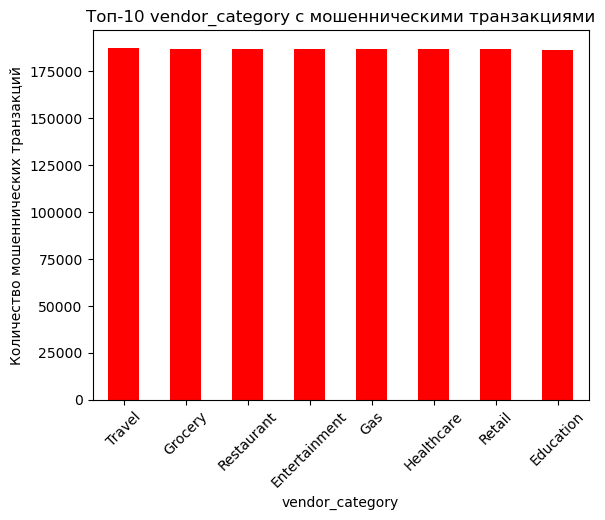

Топ-10 категорий по 'vendor_type' с is_fraud=True:
vendor_type
online       279363
physical     187200
pharmacy      93569
major         93416
local         93413
supplies      93240
medical       93200
fast_food     62786
events        62525
streaming     62206
Name: count, dtype: int64


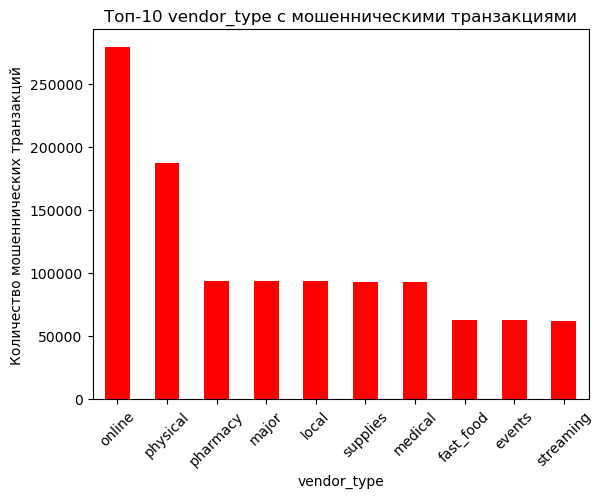

Топ-10 категорий по 'vendor' с is_fraud=True:
vendor
Local Gas Station       31205
Truck Stop              31192
Chegg                   31171
University Bookstore    31136
Highway Gas Stop        31016
Barnes & Noble          30933
DuaneReade              23513
CVS Pharmacy            23508
Walmart Grocery         23475
Medical Center          23464
Name: count, dtype: int64


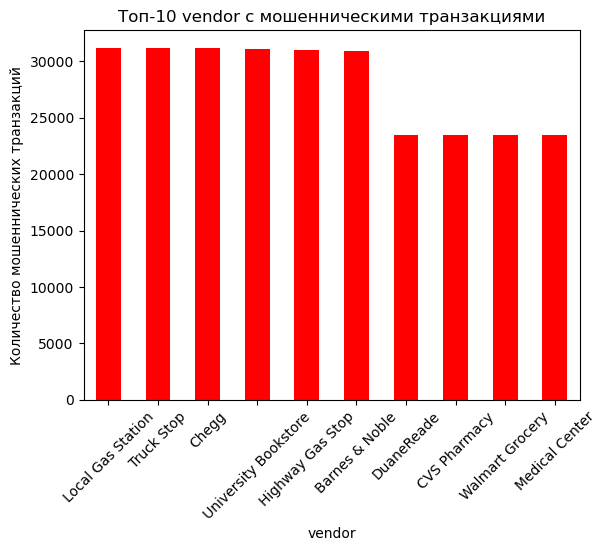

Топ-10 категорий по 'city' с is_fraud=True:
city
Unknown City    1457407
Phoenix            3786
San Jose           3777
Los Angeles        3771
San Diego          3771
Philadelphia       3739
San Antonio        3736
Chicago            3701
New York           3696
Houston            3687
Name: count, dtype: int64


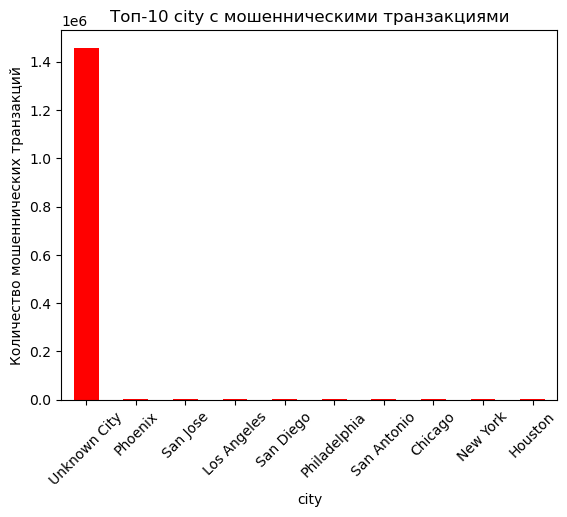

Топ-10 категорий по 'currency' с is_fraud=True:
currency
RUB    299425
MXN    298841
BRL    298629
NGN    298600
EUR     74631
AUD     37652
JPY     37592
SGD     37414
GBP     37345
USD     37312
Name: count, dtype: int64


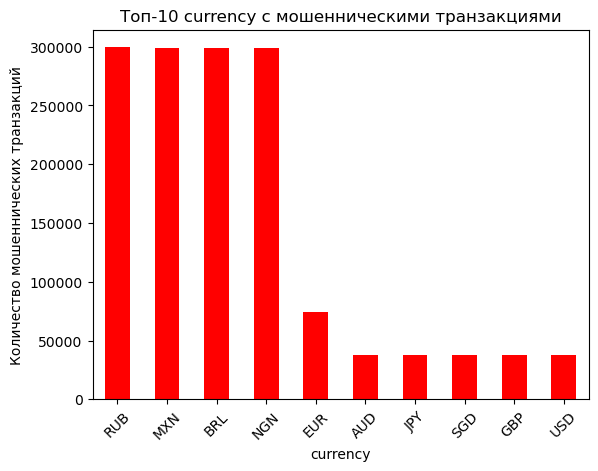

Топ-10 категорий по 'device' с is_fraud=True:
device
Chip Reader        217324
Magnetic Stripe    217204
NFC Payment        216519
Firefox            142171
Safari             141379
Android App        140844
iOS App            140306
Chrome             140087
Edge               138885
Name: count, dtype: int64


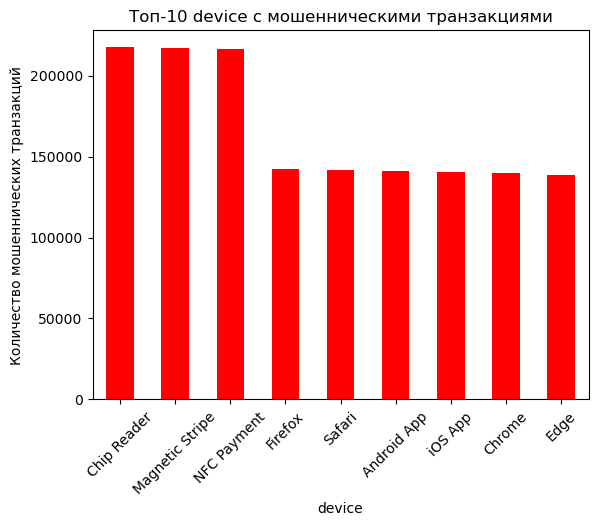

Топ-10 категорий по 'channel' с is_fraud=True:
channel
pos       651047
web       562522
mobile    281150
Name: count, dtype: int64


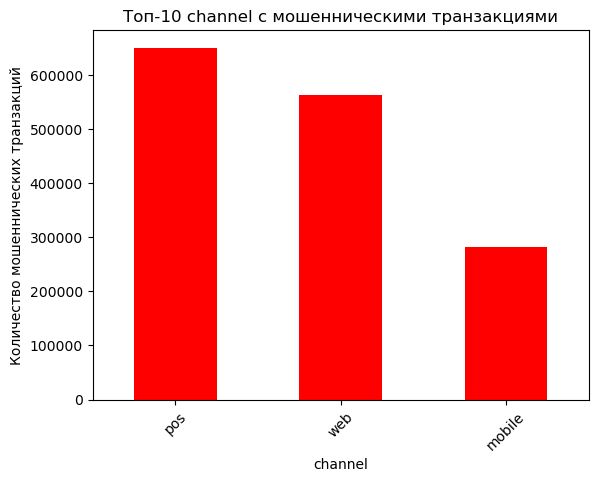

Топ-10 категорий по 'card_type' с is_fraud=True:
card_type
Basic Debit        309239
Premium Debit      307502
Platinum Credit    306190
Gold Credit        289060
Basic Credit       282728
Name: count, dtype: int64


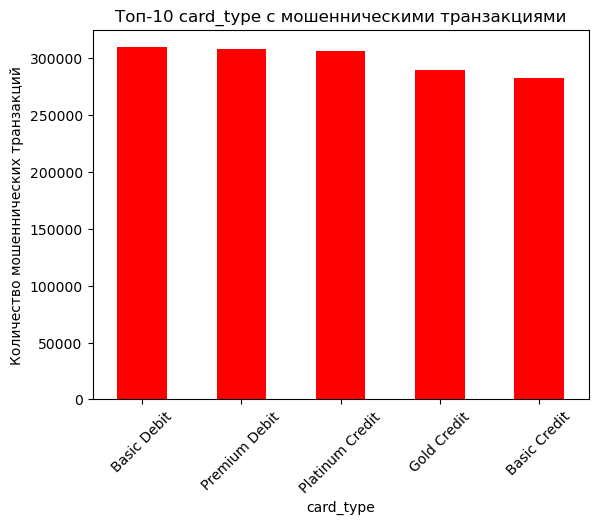

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_fraud_categories(df, column, top_n=10):
    """
    Строит топ-N категорий по количеству мошеннических транзакций (is_fraud=True).

    Параметры:
    df       : DataFrame с данными
    column   : категориальный столбец, по которому анализируем
    top_n    : количество топ категорий для отображения
    """
    # Фильтруем только мошеннические транзакции
    fraud_df = df[df['is_fraud'] == True]

    # Считаем количество по категориям
    top_categories = fraud_df[column].value_counts().head(top_n)

    print(f"Топ-{top_n} категорий по '{column}' с is_fraud=True:")
    print(top_categories)

    # Строим график
    top_categories.plot(kind='bar', color='red')
    plt.title(f"Топ-{top_n} {column} с мошенническими транзакциями")
    plt.ylabel('Количество мошеннических транзакций')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()


# Список категориальных признаков, которые хотим проверить
categorical_columns = ['vendor_category', 'vendor_type', 'vendor', 'city', 'currency', 'device', 'channel', 'card_type']

# Генерируем графики для всех категориальных колонок

for col in categorical_columns:
    plot_top_fraud_categories(df, col)


  vendor_category  fraud_rate
7          Travel    0.200341
3         Grocery    0.200194
2             Gas    0.199731
5      Restaurant    0.199696
1   Entertainment    0.199632
0       Education    0.199459
6          Retail    0.199398
4      Healthcare    0.199376


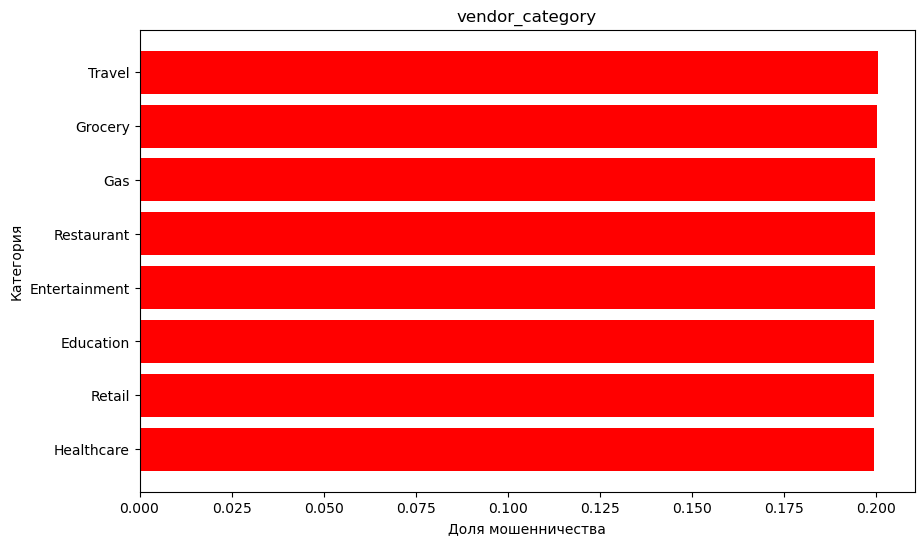

   vendor_type  fraud_rate
16   transport    0.201169
4    fast_food    0.200719
0     airlines    0.200535
12    physical    0.200206
1      booking    0.200174
3       events    0.200017
8        major    0.199821
11    pharmacy    0.199773
15    supplies    0.199758
7        local    0.199642
5       gaming    0.199558
6       hotels    0.199487
14   streaming    0.199320
10      online    0.199310
2       casual    0.199186
13     premium    0.199179
9      medical    0.198978


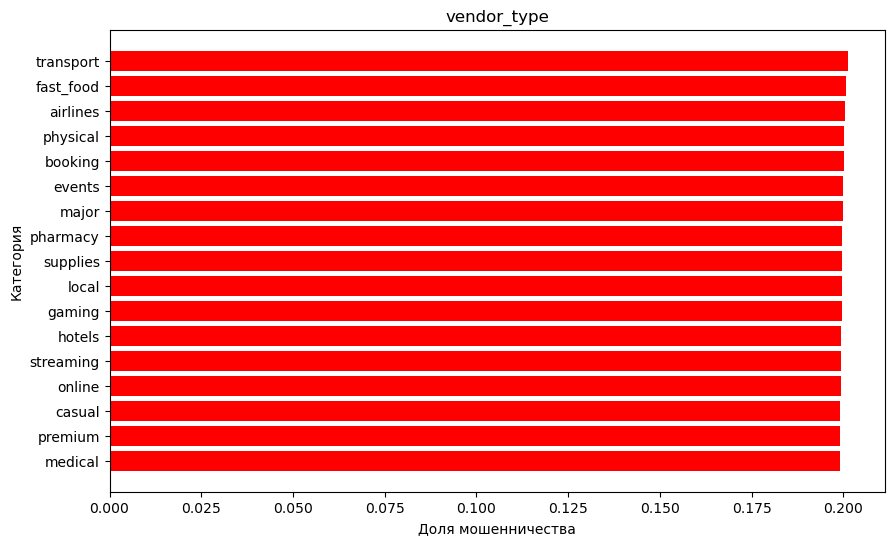

              vendor  fraud_rate
92   United Airlines    0.204074
90              Uber    0.203362
68            Publix    0.203279
81           StubHub    0.202724
45           JetBlue    0.202471
..               ...         ...
4             Amazon    0.197431
43              IKEA    0.197129
23             Delta    0.196892
34           HBO Max    0.196544
100           Westin    0.196302

[105 rows x 2 columns]


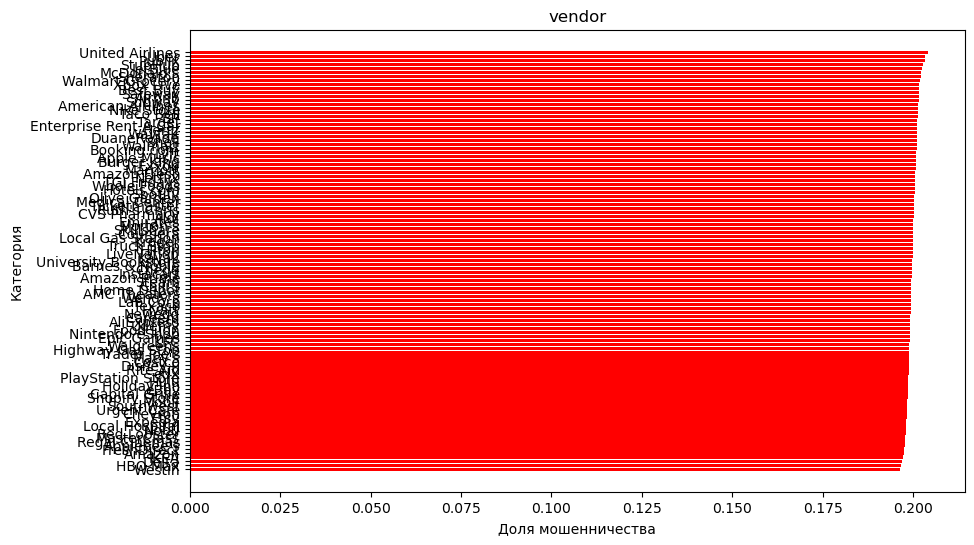

            city  fraud_rate
10  Unknown City    0.208687
3    Los Angeles    0.076191
9       San Jose    0.075517
6        Phoenix    0.075219
5   Philadelphia    0.074909
8      San Diego    0.074784
7    San Antonio    0.074602
4       New York    0.074209
0        Chicago    0.074151
2        Houston    0.073803
1         Dallas    0.072777


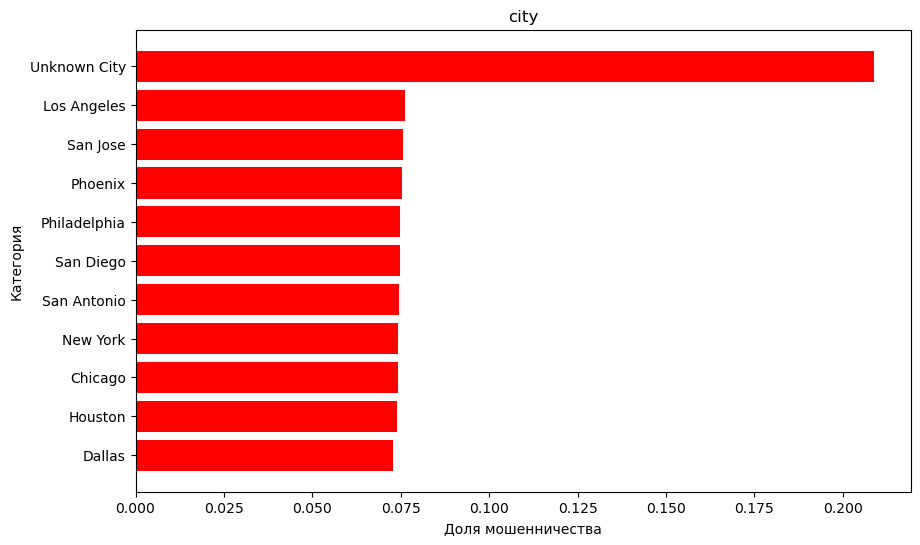

   currency  fraud_rate
6       MXN    0.380348
8       RUB    0.377238
1       BRL    0.371060
7       NGN    0.351360
0       AUD    0.075805
10      USD    0.074615
5       JPY    0.071279
3       EUR    0.070027
2       CAD    0.069988
4       GBP    0.069351
9       SGD    0.063557


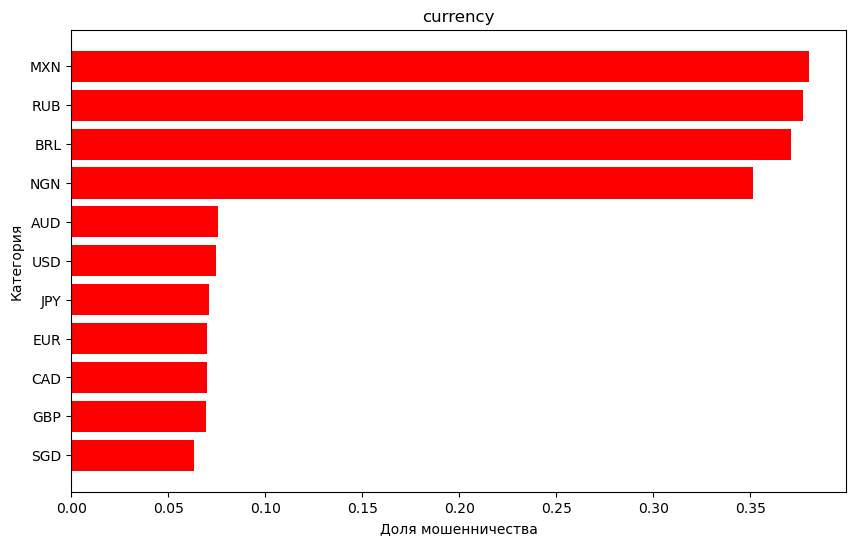

            device  fraud_rate
1      Chip Reader    1.000000
5  Magnetic Stripe    1.000000
6      NFC Payment    1.000000
4          Firefox    0.126831
7           Safari    0.126204
0      Android App    0.125070
2           Chrome    0.123710
8          iOS App    0.122703
3             Edge    0.116753


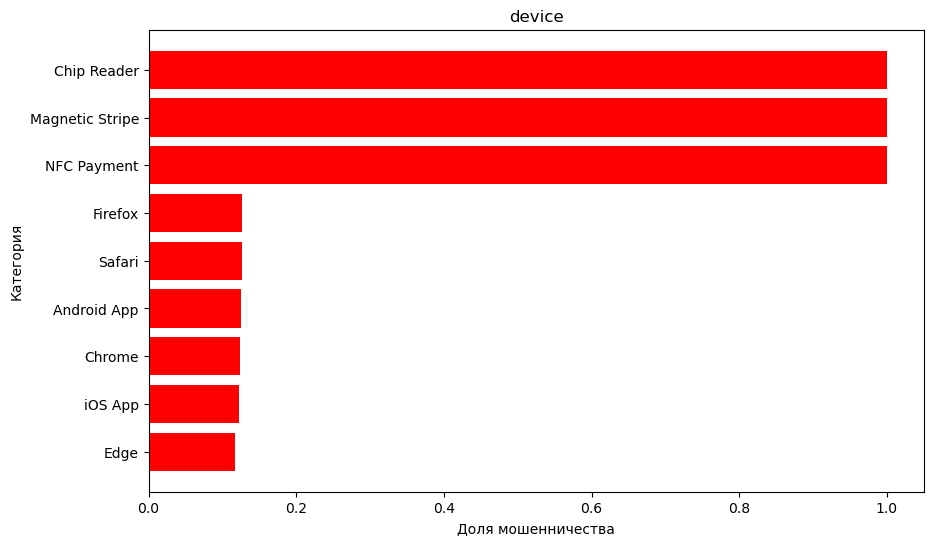

  channel  fraud_rate
1     pos    1.000000
0  mobile    0.123878
2     web    0.123275


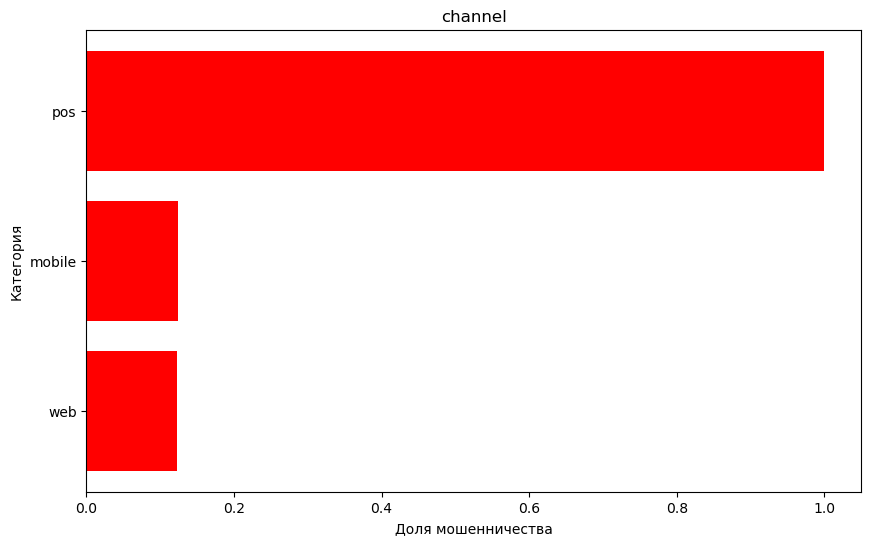

         card_type  fraud_rate
0     Basic Credit    0.199742
3  Platinum Credit    0.199731
2      Gold Credit    0.199729
4    Premium Debit    0.199721
1      Basic Debit    0.199720


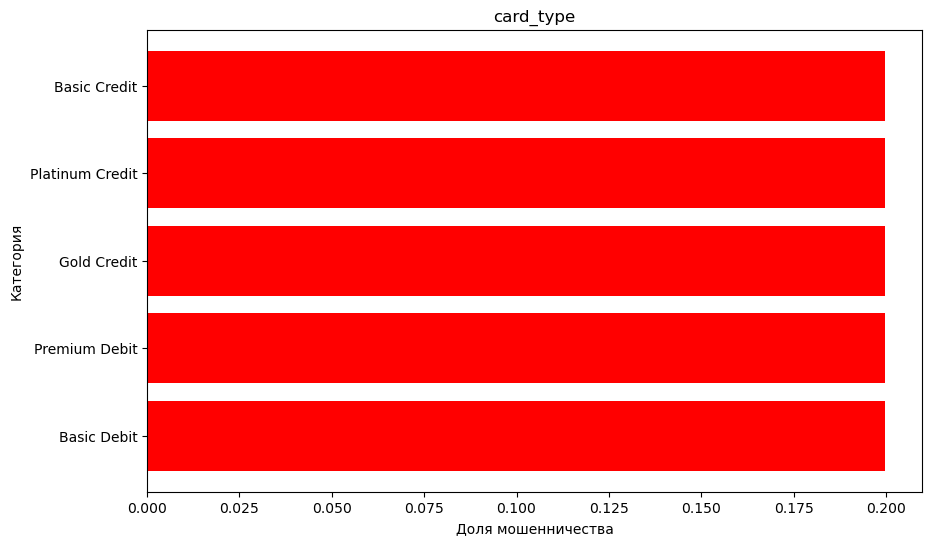

In [19]:
import pandas as pd

for col in categorical_columns:

    # Предположим, что DataFrame называется df
    # Считаем долю мошеннических транзакций по каждой категории
    fraud_ratio = (
        df.groupby(col)['is_fraud']
        .mean()  # mean() даёт долю True в группе
        .reset_index()
        .rename(columns={'is_fraud': 'fraud_rate'})
        .sort_values('fraud_rate', ascending=False)
    )

    print(fraud_ratio)

    # Визуализация
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.barh(fraud_ratio[col], fraud_ratio['fraud_rate'], color='red')
    plt.xlabel('Доля мошенничества')
    plt.ylabel('Категория')
    plt.title(col)
    plt.gca().invert_yaxis()
    plt.show()

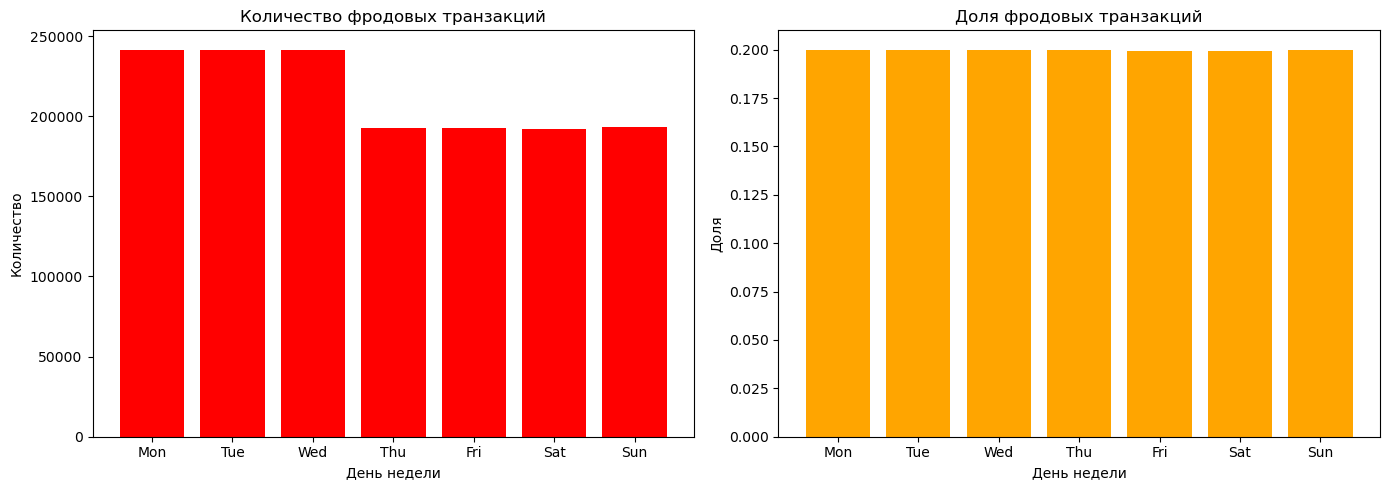

   day_of_week  fraud_count  fraud_rate day_name
6            6       193433    0.200028      Sun
0            0       241086    0.199773      Mon
2            2       241475    0.199772      Wed
1            1       241146    0.199750      Tue
3            3       192651    0.199696      Thu
4            4       192919    0.199587      Fri
5            5       192009    0.199462      Sat


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Убедимся, что timestamp в формате datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# День недели (0 = понедельник, 6 = воскресенье)
df['day_of_week'] = df['timestamp'].dt.dayofweek
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# --- Количество ---
fraud_count = (
    df[df['is_fraud'] == True]
    .groupby('day_of_week')
    .size()
    .reset_index(name='fraud_count')
)

# --- Доля ---
fraud_ratio = (
    df.groupby('day_of_week')['is_fraud']
    .mean()
    .reset_index(name='fraud_rate')
)

# Объединяем оба результата
fraud_stats = pd.merge(fraud_count, fraud_ratio, on='day_of_week')
fraud_stats['day_name'] = fraud_stats['day_of_week'].map(lambda x: day_names[x])

# --- Построение графиков ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1 — Количество
axes[0].bar(fraud_stats['day_name'], fraud_stats['fraud_count'], color='red')
axes[0].set_title('Количество фродовых транзакций')
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Количество')

# График 2 — Доля
axes[1].bar(fraud_stats['day_name'], fraud_stats['fraud_rate'], color='orange')
axes[1].set_title('Доля фродовых транзакций')
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('Доля')

plt.tight_layout()
plt.show()

print(fraud_stats.sort_values('fraud_rate', ascending=False))


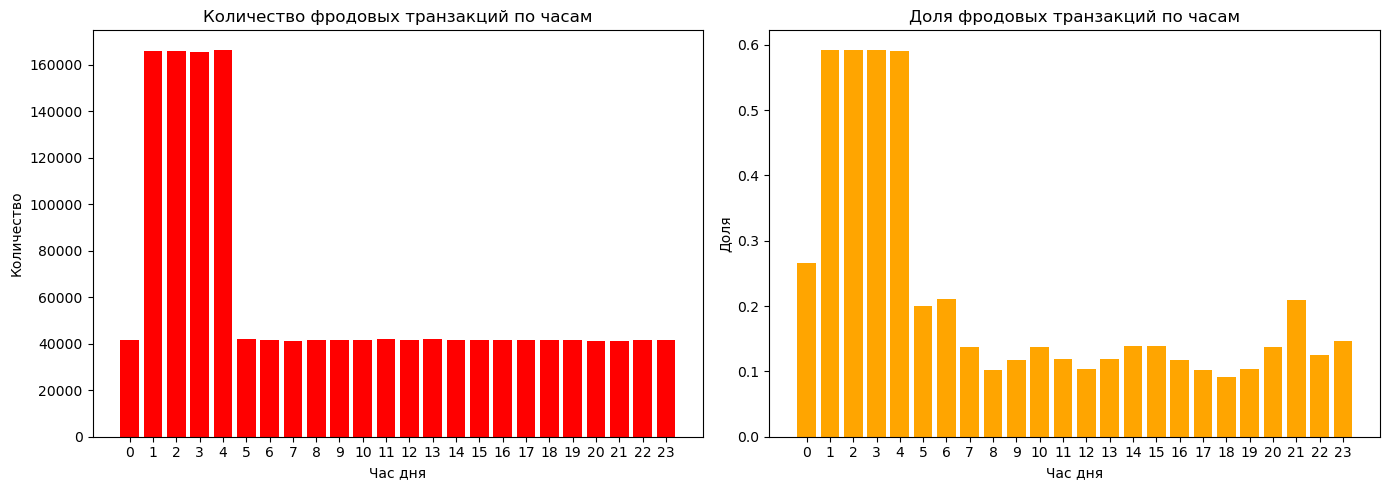

    hour  fraud_count  fraud_rate
1      1       165999    0.592566
2      2       166025    0.591949
3      3       165621    0.591438
4      4       166418    0.591254
0      0        41519    0.266559
6      6        41622    0.211413
21    21        41049    0.208831
5      5        41829    0.200591
23    23        41457    0.147152
14    14        41665    0.138813
15    15        41705    0.138760
10    10        41410    0.137796
7      7        41318    0.137189
20    20        41188    0.136914
22    22        41431    0.124432
11    11        41857    0.118744
13    13        41829    0.118645
9      9        41522    0.117809
16    16        41407    0.117507
19    19        41786    0.103220
12    12        41716    0.103017
8      8        41523    0.102447
17    17        41423    0.102366
18    18        41400    0.090711


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Убедимся, что timestamp в datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Час транзакции
df['hour'] = df['timestamp'].dt.hour

# --- Количество ---
fraud_count_hour = (
    df[df['is_fraud'] == True]
    .groupby('hour')
    .size()
    .reset_index(name='fraud_count')
)

# --- Доля ---
fraud_ratio_hour = (
    df.groupby('hour')['is_fraud']
    .mean()
    .reset_index(name='fraud_rate')
)

# Объединяем
fraud_stats_hour = pd.merge(fraud_count_hour, fraud_ratio_hour, on='hour')

# --- Построение графиков ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1 — Количество
axes[0].bar(fraud_stats_hour['hour'], fraud_stats_hour['fraud_count'], color='red')
axes[0].set_title('Количество фродовых транзакций по часам')
axes[0].set_xlabel('Час дня')
axes[0].set_ylabel('Количество')
axes[0].set_xticks(range(0, 24))

# График 2 — Доля
axes[1].bar(fraud_stats_hour['hour'], fraud_stats_hour['fraud_rate'], color='orange')
axes[1].set_title('Доля фродовых транзакций по часам')
axes[1].set_xlabel('Час дня')
axes[1].set_ylabel('Доля')
axes[1].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

print(fraud_stats_hour.sort_values('fraud_rate', ascending=False))


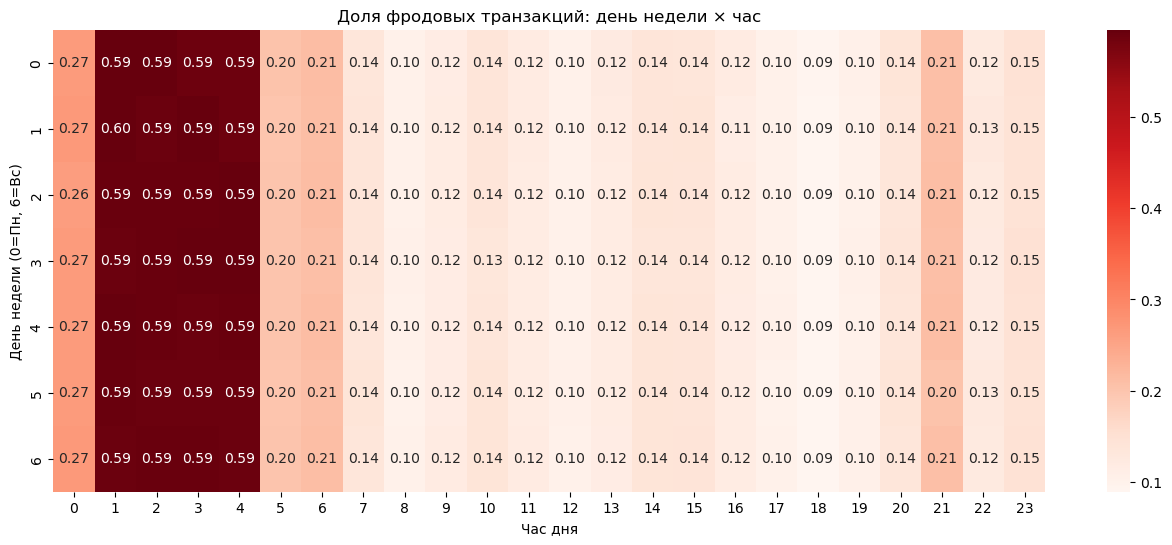

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# День недели: 0 = Понедельник, 6 = Воскресенье
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour

# Группировка: доля фродовых транзакций
heatmap_data = df.groupby(['day_of_week', 'hour'])['is_fraud'].mean().reset_index()

# Превращаем в матрицу для тепловой карты
heatmap_matrix = heatmap_data.pivot(index='day_of_week', columns='hour', values='is_fraud')

# Визуализация
plt.figure(figsize=(16,6))
sns.heatmap(heatmap_matrix, cmap='Reds', annot=True, fmt=".2f")
plt.title('Доля фродовых транзакций: день недели × час')
plt.xlabel('Час дня')
plt.ylabel('День недели (0=Пн, 6=Вс)')
plt.show()

In [31]:
# Топ пользователей по количеству транзакций
top_customers = df['customer_id'].value_counts().head(10)
print("\nТоп-10 пользователей по количеству транзакций:\n", top_customers)


Топ-10 пользователей по количеству транзакций:
 customer_id
CUST_91730    4015
CUST_24836    3767
CUST_87928    3756
CUST_81009    3744
CUST_77434    3728
CUST_12255    3699
CUST_49715    3667
CUST_88176    3664
CUST_79625    3655
CUST_41245    3623
Name: count, dtype: int64


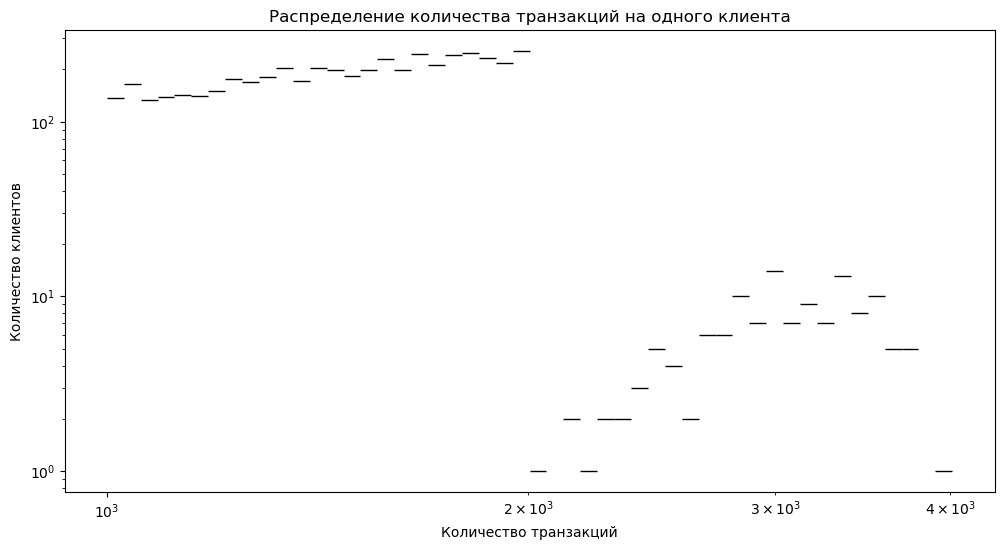

count    4869.000000
mean     1537.023208
std       384.140736
min      1000.000000
25%      1258.000000
50%      1506.000000
75%      1765.000000
max      4015.000000
Name: count, dtype: float64
Топ-10 клиентов по количеству транзакций:
 customer_id
CUST_91730    4015
CUST_24836    3767
CUST_87928    3756
CUST_81009    3744
CUST_77434    3728
CUST_12255    3699
CUST_49715    3667
CUST_88176    3664
CUST_79625    3655
CUST_41245    3623
Name: count, dtype: int64


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Считаем количество транзакций на каждого клиента
customer_tx_counts = df['customer_id'].value_counts()

plt.figure(figsize=(12,6))
sns.histplot(customer_tx_counts, bins=50, log_scale=(True, True))  # логарифмическая шкала для наглядности
plt.title("Распределение количества транзакций на одного клиента")
plt.xlabel("Количество транзакций")
plt.ylabel("Количество клиентов")
plt.show()

# Дополнительно можно вывести статистику
print(customer_tx_counts.describe())
print("Топ-10 клиентов по количеству транзакций:\n", customer_tx_counts.head(10))